In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from keras.utils.np_utils import to_categorical 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.applications import VGG16
import math
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
img_width, img_height = 224,224

train_data_dir = '/content/drive/MyDrive/dataset/train'
validation_data_dir = '/content/drive/MyDrive/dataset/test'
 
batch_size = 32

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

vgg16 = VGG16(weights='imagenet', include_top=False)
datagen = ImageDataGenerator(rescale=1. / 255) 

In [ ]:
train_generator = datagen.flow_from_directory( 
    train_data_dir, 
    target_size=(img_width, img_height), 
    batch_size=batch_size,
    color_mode="rgb",
    class_mode='categorical', 
    shuffle=False) 
train_data = vgg16.predict(train_generator) 
train_labels = train_generator.classes  
train_labels = to_categorical(train_labels, num_classes=num_classes) 

Found 320 images belonging to 5 classes.
10/10 [==============================] - 216s 21s/step


In [ ]:
validation_generator = datagen.flow_from_directory(  
     validation_data_dir,  
     target_size=(img_width, img_height),  
     batch_size=batch_size,
     color_mode="rgb",  
     class_mode='categorical',  
     shuffle=False)  
validation_data = vgg16.predict(validation_generator)
validation_labels = validation_generator.classes  
validation_labels = to_categorical(validation_labels, num_classes=num_classes) 

Found 80 images belonging to 5 classes.
3/3 [==============================] - 54s 16s/step


In [ ]:
model = tf.keras.models.load_model('my_model.h5')

In [ ]:
from sklearn import metrics
predict = np.round(model.predict(validation_data),0)
batik = ['Batik Ceplok', 'Batik Kawung', 'Batik Parang', 'Batik Segar Jagad', 'Batik Tambal']
classification = metrics.classification_report(validation_labels, predict, target_names=batik) 
print(classification)

3/3 [==============================] - 0s 34ms/step
                   precision    recall  f1-score   support

     Batik Ceplok       0.56      0.60      0.58        15
     Batik Kawung       0.86      0.78      0.82        23
     Batik Parang       0.91      1.00      0.95        10
Batik Segar Jagad       0.76      0.76      0.76        17
     Batik Tambal       0.79      0.73      0.76        15

        micro avg       0.77      0.76      0.77        80
        macro avg       0.78      0.78      0.77        80
     weighted avg       0.78      0.76      0.77        80
      samples avg       0.76      0.76      0.76        80



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
categorical_validation_labels = pd.DataFrame(validation_labels).idxmax(axis=1)
categorical_validation_data = pd.DataFrame(predict).idxmax(axis=1)
confusion_matrix = confusion_matrix(categorical_validation_labels, categorical_validation_data)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix, without normalization')
  
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)
 
  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i, j] > thresh else 'black')

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label') 

Normalized confusion matrix


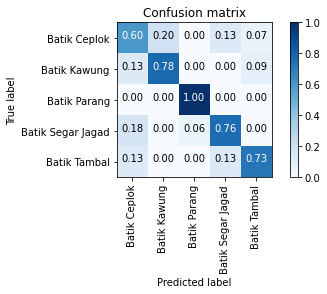

In [ ]:
plot_confusion_matrix(confusion_matrix, 
                      ['Batik Ceplok', 'Batik Kawung', 'Batik Parang', 'Batik Segar Jagad', 'Batik Tambal'],
                      normalize=True)

Confusion matrix, without normalization


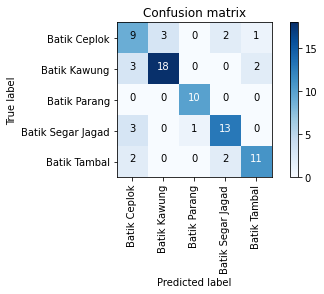

In [ ]:
plot_confusion_matrix(confusion_matrix, 
                      ['Batik Ceplok', 'Batik Kawung', 'Batik Parang', 'Batik Segar Jagad', 'Batik Tambal'])

In [ ]:
def read_image(file_path):
    print("[INFO] loading and preprocessing image...")   
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
def read_accuracy(file_path):
    print("[INFO] loading accuracy...")   
    image = load_img(file_path, target_size=(224, 224))  
    image = img_to_array(image)  
    image = np.expand_dims(image, axis=0)
    image /= 255.  
    return image

In [ ]:
path = '/content/drive/MyDrive/dataset/test/Batik Parang/52.jpg'

[INFO] loading and preprocessing image...


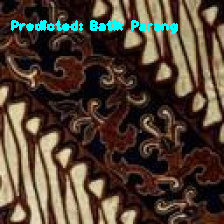

In [ ]:
images = read_image(path)
bt_prediction = vgg16.predict(images)
preds = model.predict(bt_prediction)
class_dictionary = generator_top.class_indices
inID = np.argmax(preds[0]) 
inv_map = {v: k for k, v in class_dictionary.items()}  
label = inv_map[inID]  

image = cv2.imread(path) 
cv2.putText(image, "Predicted: {}".format(label), (10, 30), cv2.FONT_HERSHEY_PLAIN, 0.85, (255, 255, 0), 2)
cv2_imshow(image)

In [ ]:
images = read_accuracy(path)
bt_prediction = vgg16.predict(images)
preds = model.predict(bt_prediction)
class_dictionary = generator_top.class_indices
inID = np.argmax(preds[0]) 
inv_map = {v: k for k, v in class_dictionary.items()}  
label = inv_map[inID] 
types = ['Batik Ceplok', 'Batik Kawung', 'Batik Parang', 'Batik Segar Jagad', 'Batik Tambal']
for idx, type, x in zip(range(0,10), types , preds[0]):
    print("ID: {}, Label: {} {}%".format(idx, type, round(x*100,2)))
print("Image ID: {}, Label: {}".format(inID, label))

[INFO] loading accuracy...
ID: 0, Label: Batik Ceplok 0.0%
ID: 1, Label: Batik Kawung 0.0%
ID: 2, Label: Batik Parang 100.0%
ID: 3, Label: Batik Segar Jagad 0.0%
ID: 4, Label: Batik Tambal 0.0%
Image ID: 2, Label: Batik Parang
